<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Step 1: Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [2]:
df = pd.read_csv('./StudentsPerformance.csv')

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# Step 4: Display PairPlot

g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\SOFTWARE_INSTALLTION\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


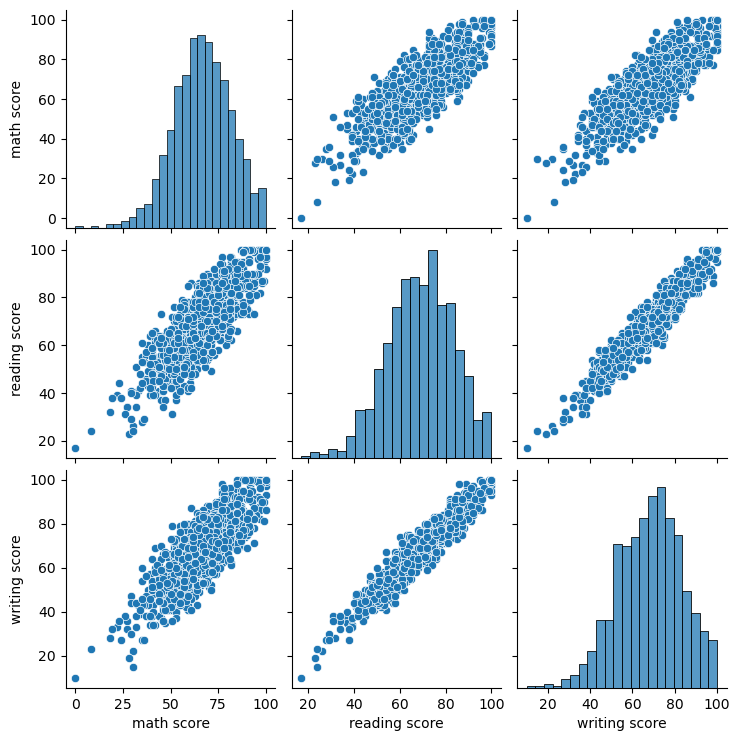

In [7]:
sns.pairplot(df)

# Step 5: Correlation heatmap

<Axes: >

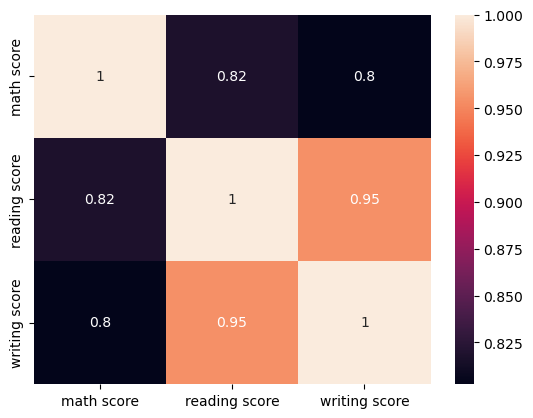

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Step 6: Distribution of numerical features

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

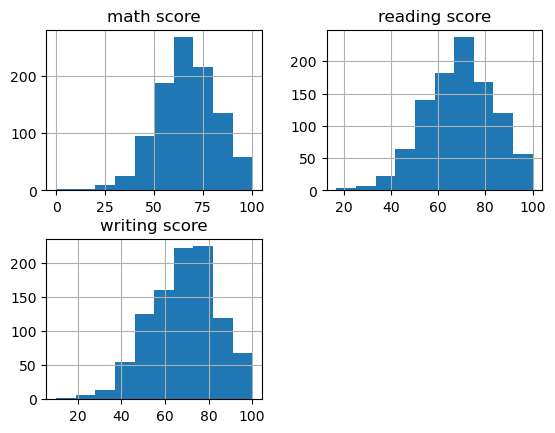

In [9]:
df.hist()

<Axes: >

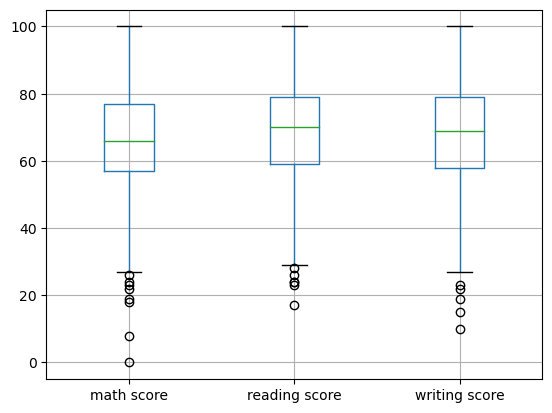

In [10]:
df.boxplot()

# Step 7: Apply StandardScaler

In [11]:
stdscal = StandardScaler()

In [12]:
x_transform = stdscal.fit_transform(df[['math score', 'reading score', 'writing score']])

In [13]:
x_transform

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

# Step 8: Elbow method to find optimal k

### What is an Elbow Point?

Think of it like this: When you're trying to group similar things together (clustering), you need to decide how many groups to make. The elbow point helps you make this decision in a smart way.

Imagine you're plotting a line on a graph that shows how well your grouping works:

At first, adding more groups makes things much better (the line drops steeply)
But at some point, adding more groups only gives tiny improvements (the line flattens out)
The "elbow point" is where this change happens - it looks like an elbow on your graph! This point tells you the ideal number of groups to use. After this point, creating more groups doesn't help much and might just make things unnecessarily complicated.

In [28]:
distances = []
for k in range(1, 11):
    km = KMeans(n_clusters=k,random_state=42)
    km = km.fit(x_transform)
    distances.append(km.inertia_)

distances

[3000.000000000001,
 1253.857114450882,
 788.3656838915334,
 604.9240060963618,
 494.93117746347906,
 444.7596671831983,
 385.63998703400836,
 346.8632673863846,
 314.79260371810824,
 300.9322778661916]

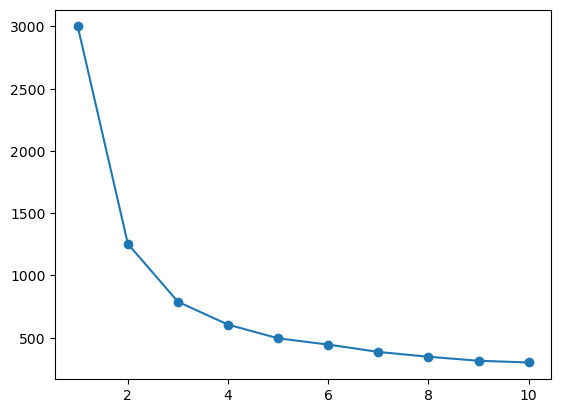

In [29]:
plt.plot(range(1, 11), distances, marker='o')

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=3, random_state=42)

In [16]:
model.fit(x_transform)

KMeans(n_clusters=3, random_state=42)

# Step 10: Print Cluster Center

In [17]:
model.cluster_centers_

array([[-0.04951336, -0.04870596, -0.01529686],
       [-1.18720058, -1.26762535, -1.28838441],
       [ 1.03099793,  1.09485536,  1.06358515]])

In [32]:
df['KMeans'] = model.labels_
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,KMeans
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,2
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,2
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


# Step 11: Plot Cluster

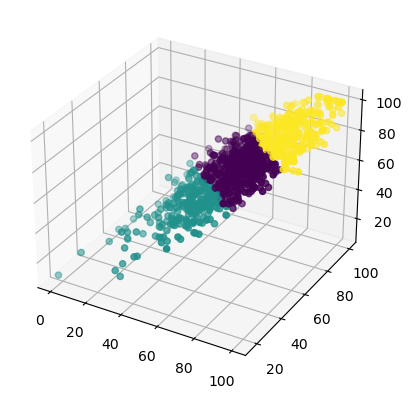

In [33]:
ax = plt.axes(projection='3d')

ax.scatter3D(df['math score'], df['reading score'], df['writing score'], c=df['KMeans'])

# Step 12:Analyze clusters 

# Step 13: Perform K-Medoids

# Step:14 Comparison of K-means and K-medoids Clusters

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]